Indivudual Assignment Inventory Management. Made by Casper Dik (s3497887)

In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import poisson, randint

## EOQ

Define the parameters

In [2]:
D = 60
c = 2.5
K = 5
h = 1.5

Define the EOQ function

In [3]:
def EOQ(D,K,h):
    return math.sqrt((2*K*D)/h)

Run the EOQ function with the previously define parameters

In [4]:
EOQ(D,K,h)

20.0

Define the cost functions 

In [5]:
def C1(h,Q):
    # average holding cost
    return (h*Q)/2

def C2(K,D,Q):
    # average ordering cost
    return (K*D)/Q

def C3(c,D):
    # procurement cost
    return c*D

def cost(c, D, K, Q, h):
    return C1(h,Q) + C2(K,D,Q) + C3(c,D)

Calculate the costs

In [6]:
Q = EOQ(D,K,h)
cost(c, D, K, Q, h)

180.0

Create an empty dataframe

In [7]:
df = pd.DataFrame(index=np.linspace(5,50,10, dtype=int), columns=["C1(Q)", "C2(Q)", "C3(Q)", "C(Q)"])

Fill the datframe using the cost functions 

In [8]:
df["C1(Q)"] = C1(h, df.index.values)
df["C2(Q)"] = C2(K,D,df.index.values)
df["C3(Q)"] = C3(c,D)
df["C(Q)"] = cost(c, D, K, df.index.values, h)

From the table below, we can verify that the calculated Q* from the EOQ function indeed corresponds to the lowest cost

In [9]:
df

,C1(Q),C2(Q),C3(Q),C(Q)
5,3.75,60.000000,150.0,213.750000
10,7.50,30.000000,150.0,187.500000
15,11.25,20.000000,150.0,181.250000
20,15.00,15.000000,150.0,180.000000
25,18.75,12.000000,150.0,180.750000
30,22.50,10.000000,150.0,182.500000
35,26.25,8.571429,150.0,184.821429
40,30.00,7.500000,150.0,187.500000
45,33.75,6.666667,150.0,190.416667
50,37.50,6.000000,150.0,193.500000


Plot the results

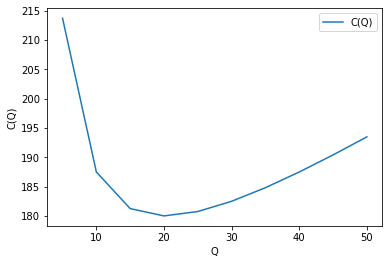

In [10]:
plt.plot(df.index.values, df["C(Q)"], label="C(Q)")
plt.xlabel("Q")
plt.ylabel("C(Q)")
plt.legend()

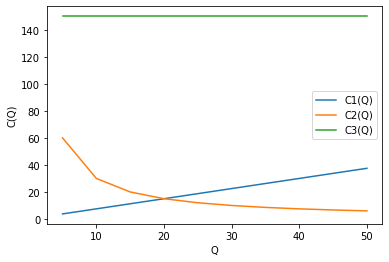

In [11]:
plt.plot(df.index.values, df["C1(Q)"], label="C1(Q)")
plt.plot(df.index.values, df["C2(Q)"], label="C2(Q)")
plt.plot(df.index.values, df["C3(Q)"], label="C3(Q)")
plt.xlabel("Q")
plt.ylabel("C(Q)")
plt.legend()

The average holding cost(C1(Q)) linearly increases as the order quantity Q increases, whereas, the average ordering cost(C2(Q)) decreases with the order quantity. The procurement cost are constant as they do not depend on Q. The overal cost first decreases with order quantity, implying that the decrease in average ordering cost outweights the increase in average holding cost untill Q*. After Q* the total start to increase as now the increase in holding cost outweights the decrease in ordering cost.

Convert parameters to monthly and recalculate the EOQ

In [12]:
D = 60/12
h = 1.5/12
EOQ(D,K,h)

20.0

Q* is the same with monthly parameters which is strange since the unit of time has changed.

Create a set of zeros for q, D, I

In [13]:
q = np.zeros(13)
D = np.zeros(13)
I = np.zeros(13)

fill in the demand

In [14]:
D[1:] = 60/12

Define a function that calculates the quantity to order when demand in next period can not be met

In [15]:
def quantity_to_order(I_prev, D_n, K, h):
    if I_prev < D_n:
        q = EOQ(D_n,K,h)
    else:
        q = 0
    return q

Define a function that calculates the inventory in period n based on inventory in n-1, demand in n and quantity order in n

In [16]:
def inventory_n(I_prev, q_n, D_n):
    return I_prev + q_n - D_n

Create an empty dataframe

In [17]:
df1 = pd.DataFrame(index=np.linspace(0,12,13, dtype=int), columns=["q", "D", "I"])

Fill the dataframe using the functions quantity_to_order and inventory_n

In [18]:
df1["I"][0] = 0 
df1["q"][0] = 0 
df1["D"] = D
for i in np.linspace(1,12,12):
    df1["q"][i] = quantity_to_order(df1["I"][i-1], df1["D"][i], K, h)
    df1["I"][i] = inventory_n(df1["I"][i-1], df1["q"][i], df1["D"][i])

C:\Users\CASPER~1\AppData\Local\Temp/ipykernel_13948/2249452481.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["q"][i] = quantity_to_order(df1["I"][i-1], df1["D"][i], K, h)
C:\Users\Casper Dik\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\CASPER~1\AppData\Local\Temp/ipykernel_13948/2249452481.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

show result:

In [19]:
df1

,q,D,I
0,0,0.0,0
1,20.0,5.0,15.0
2,0,5.0,10.0
3,0,5.0,5.0
4,0,5.0,0.0
5,20.0,5.0,15.0
6,0,5.0,10.0
7,0,5.0,5.0
8,0,5.0,0.0
9,20.0,5.0,15.0


As long as Q* is greater than demand of next period, no stockouts can happen.

Plot the results

Text(0, 0.5, 'Inventory level per month')

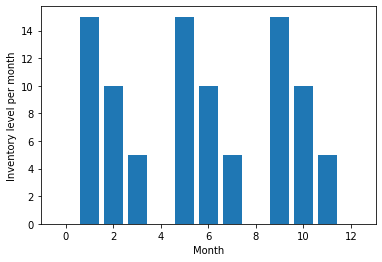

In [20]:
plt.bar(df1.index.values, df1["I"])
plt.xlabel("Month")
plt.ylabel("Inventory level per month")

Inventory level behaves as expected. It decreases over time, untill new inventory is bought.

Define the monthly cost function and calculate the cost

In [21]:
def C1_months(h, I):
    return I.sum() * h

def C2_months(K, q):
    return K * q[q>0].count()

def C3_months(c, q):
    return c * q.sum()

def C_months(h, I, K, q, c):
    return C1_months(h, I) + C2_months(K, q) + C3_months(c, q)

C_months(h, df1["I"], K, df1["q"], c)

176.25

The total cost here is lower than with step 5. The difference comes from the holding cost, which can now be more accurately be calculated. The ordering and procurement costs are the same.

## Distributions

Define the domain and create an empty dataframe

In [22]:
domain = np.linspace(1,6,6)
df2 = pd.DataFrame(index=domain, columns=["f(x)", "F(x)"])

Find the f(x) and F(x) values for the domain

In [23]:
f_x = {}
F_x = {}

cum = 0
for x in domain:
    f_x[x] = 1/6
    cum += 1/6
    F_x[x] = cum
    
df2["f(x)"] = f_x.values()
df2["F(x)"] = F_x.values()

In [24]:
df2

,f(x),F(x)
1.0,0.166667,0.166667
2.0,0.166667,0.333333
3.0,0.166667,0.500000
4.0,0.166667,0.666667
5.0,0.166667,0.833333
6.0,0.166667,1.000000


Plot the results on a bar graph

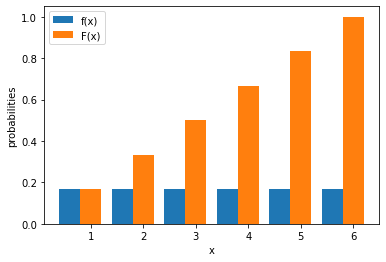

In [25]:
w = 0.4
plt.bar(domain-w, df2["f(x)"], width=w, label="f(x)", align="center")
plt.bar(domain, df2["F(x)"], width=w, label="F(x)", align="center")
plt.xlabel("x")
plt.ylabel("probabilities")
plt.legend()

The probability distribution function is constant since the probability of rolling each number has the same probability for a fair dice. The cumulative distribution increases as expected since the probability of rolling x or lower increases with x.

Repeat the analysis but now for a dice with 21 sides

In [26]:
domain = np.linspace(0,20,21)
df2 = pd.DataFrame(index=domain, columns=["f(x)", "F(x)"])

f_x = {}
F_x = {}

cum = 0
for x in domain:
    f_x[x] = 1/21
    cum += 1/21
    F_x[x] = cum
    
df2["f(x)"] = f_x.values()
df2["F(x)"] = F_x.values()

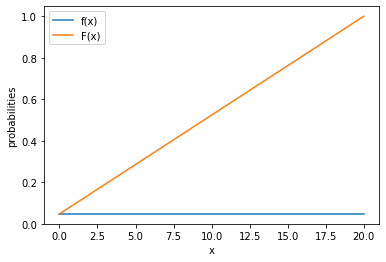

In [27]:
plt.plot(domain, df2["f(x)"], label="f(x)")
plt.plot(domain, df2["F(x)"], label="F(x)")
plt.xlabel("x")
plt.ylabel("probabilities")
plt.legend()

Repeat the analysis but now not for a dice but with a poisson distribution with mean=10

In [28]:
domain = np.linspace(0,20,21)
df2 = pd.DataFrame(index=domain, columns=["f(x)", "F(x)"])

f_x = {}
F_x = {}

cum = 0
mu = 10
for x in domain:
    f_x[x] = poisson.pmf(x, 10)
    cum += f_x[x]
    F_x[x] = cum
    
df2["f(x)"] = f_x.values()
df2["F(x)"] = F_x.values()

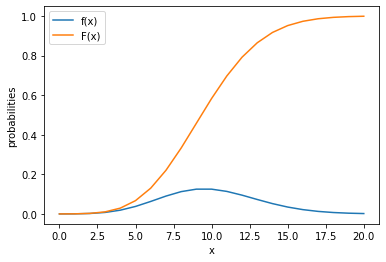

In [29]:
plt.plot(domain, df2["f(x)"], label="f(x)")
plt.plot(domain, df2["F(x)"], label="F(x)")
plt.xlabel("x")
plt.ylabel("probabilities")
plt.legend()

The shape of the pdf and cdf are different because they are from different distributions. Previously, the pdf was constant since it was a dice but now it is from a poisson distribution with mu=10.

## Expectations

define the domain and f_x

In [30]:
domain = np.linspace(0,10,11)
f_x = [0.02, 0.11, 0.14, 0.13, 0.04, 0.04, 0.03, 0.11, 0.07, 0.17, 0.14]

create a function that computes the expected value and takes input f_x and g_x

In [31]:
def expected_value(f_x, g_x):
    return (g_x*f_x).sum()

In [32]:
expected_value(f_x, domain)

5.58

change the g_x function and recalculate the expected value

In [33]:
g_x = 2*domain
expected_value(f_x, g_x)

11.16

change the g_x function and recalculate the expected value

In [34]:
g_x = domain-5
expected_value(f_x, g_x)

0.5799999999999998

change the g_x function and recalculate the expected value

In [35]:
g_x = 2*domain+5
expected_value(f_x, g_x)

16.16

change the g_x function and recalculate the expected value

In [36]:
g_x = domain**2
expected_value(f_x, g_x)

42.2

change the g_x function and recalculate the expected value

In [37]:
g_x = (domain-5).clip(min=0)
expected_value(f_x, g_x)

1.8400000000000003

change the g_x function and recalculate the expected value

In [38]:
g_x = (5-domain).clip(min=0)
expected_value(f_x, g_x)

1.2600000000000002

Compute E[X]

In [39]:
E_X = np.dot(domain, f_x)
print(E_X)

5.58


compute g(E[X]) for all previously used g(x)

In [40]:
g_x_28 = E_X
print("g(E[X]): ", g_x_28)
g_x_29 = E_X*2
print("g(E[X]): ", g_x_29)
g_x_30 = E_X - 5
print("g(E[X]): ", g_x_30)
g_x_31 = 2*E_X + 5
print("g(E[X]): ", g_x_31)
g_x_32 = E_X**2
print("g(E[X]): ", g_x_32)
g_x_33 = max(E_X-5, 0)
print("g(E[X]): ", g_x_33)
g_x_34 = max(5-E_X, 0)
print("g(E[X]): ", g_x_34)

g(E[X]):  5.58
g(E[X]):  11.16
g(E[X]):  0.5800000000000001
g(E[X]):  16.16
g(E[X]):  31.136400000000002
g(E[X]):  0.5800000000000001
g(E[X]):  0


g(E[X]) is equal to E[g(x)] for the g(x) functions of step 28-31. The difference with the g(x) function that are not similar is the fact that these are not linear. All the g(x) functions that work are linear functions whereas the ones that do not work are not.  

## Random

Create an array with 1000 random integers from 0-20 and an array with 1000 numbers draw from a poisson distribution with mean=10

In [41]:
rvs_randint = randint.rvs(0, 21, size=1000)
rvs_poisson = poisson.rvs(10, size=1000)

Define a function that calculates the
percentage of generated random numbers that are equal to the value x

In [42]:
def f_sim_x(x, dist):
    return list(dist).count(x)/len(dist)

create and fill dataframes with the f_sim(x) an F_sim(x) for the randomint and poisson distributions

In [43]:
x = np.linspace(0,20,21)
df4_randint = pd.DataFrame(index=x, columns=["f_sim(x)", "F_sim(x)"])
df4_poisson = pd.DataFrame(index=x, columns=["f_sim(x)", "F_sim(x)"])
cum_randint = 0
cum_poisson = 0
for i in x:
    # randint
    df4_randint["f_sim(x)"][i] = f_sim_x(i, rvs_randint)
    cum_randint += df4_randint["f_sim(x)"][i]
    df4_randint["F_sim(x)"][i] = cum_randint
    
    # poisson
    df4_poisson["f_sim(x)"][i] = f_sim_x(i, rvs_poisson)
    cum_poisson += df4_poisson["f_sim(x)"][i]
    df4_poisson["F_sim(x)"][i] = cum_poisson

In [44]:
df4_poisson

,f_sim(x),F_sim(x)
0.0,0.0,0.0
1.0,0.0,0.0
2.0,0.001,0.001
3.0,0.007,0.008
4.0,0.016,0.024
5.0,0.041,0.065
6.0,0.061,0.126
7.0,0.093,0.219
8.0,0.116,0.335
9.0,0.125,0.46


plot the results

Text(0, 0.5, 'relative frequencies')

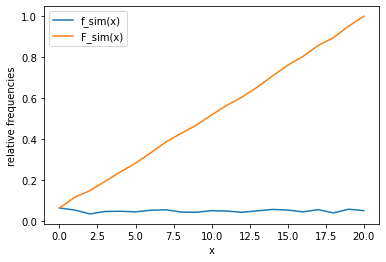

In [45]:
plt.plot(x, df4_randint["f_sim(x)"], label="f_sim(x)")
plt.plot(x, df4_randint["F_sim(x)"], label="F_sim(x)")
plt.legend()
plt.xlabel("x")
plt.ylabel("relative frequencies")

plt.plot(x, df4_poisson["f_sim(x)"], label="f_sim(x)")
plt.plot(x, df4_poisson["F_sim(x)"], label="F_sim(x)")
plt.legend()
plt.xlabel("x")
plt.ylabel("relative frequencies")

The graphs from step 23-24 and step 41 are very similar and by the law of large numbers the graphs from step 41 will converge to the graphs of step 23-24 when the size of the drawn random numbers increases.

## Simulation

create array with zeros

In [46]:
q = np.zeros(10001)
D = np.zeros(10001)
I = np.zeros(10001)

fill in the demand array using a poisson distribution with mean=10

In [47]:
D[1:] = poisson.rvs(10, size=10000)

define parameters s,Q and the function for the (s,Q) policy

In [48]:
s = 5
Q = 15
def s_Q_policy(s, Q, I):
    if I < s:
        return Q
    else:
        return 0

create an empty dataframe

In [49]:
data = {"q": q, "D": D, "I": I}
df5 = pd.DataFrame(index=np.linspace(0,10000,10001), data=data)

fill the dataframe using the function s_Q_policy and inventory_n

In [50]:
for i in np.linspace(1,10000,10000):
    I = df5["I"][i-1]
    df5["q"][i] = s_Q_policy(s, Q, I)
    df5["I"][i] = inventory_n(I, df5["q"][i], df5["D"][i])

In [51]:
df5.head(10)

,q,D,I
0.0,0.0,0.0,0.0
1.0,15.0,9.0,6.0
2.0,0.0,9.0,-3.0
3.0,15.0,10.0,2.0
4.0,15.0,11.0,6.0
5.0,0.0,9.0,-3.0
6.0,15.0,8.0,4.0
7.0,15.0,8.0,11.0
8.0,0.0,10.0,1.0
9.0,15.0,7.0,9.0


Define functions to calculate the performance indicators

In [52]:
def average_on_hand_inv(I):
    return I[I>0].sum()/len(I)

def average_backlog(I):
    return abs(I[I<0].sum()/len(I))

def fraction_orders_places(q):
    return q[q>0].count()/len(q)

In [53]:
print("average inventory at hand: ", average_on_hand_inv(df5["I"]))
print("average backlog: ", average_backlog(df5["I"]))
print("fraction periods where orders are placed: ", fraction_orders_places(df5["q"]))

average inventory at hand:  3.2275772422757725
average backlog:  1.42995700429957
fraction periods where orders are placed:  0.668933106689331


Examine how changing the values of s and Q affects performance indicators by increasing Q and decreasing s 

##### increasing Q:

In [54]:
Q = 30

In [55]:
for i in np.linspace(1,10000,10000):
    I = df5["I"][i-1]
    df5["q"][i] = s_Q_policy(s, Q, I)
    df5["I"][i] = inventory_n(I, df5["q"][i], df5["D"][i])

In [56]:
print("average inventory at hand: ", average_on_hand_inv(df5["I"]))
print("average backlog: ", average_backlog(df5["I"]))
print("fraction periods where orders are placed: ", fraction_orders_places(df5["q"]))

average inventory at hand:  10.12978702129787
average backlog:  0.6724327567243276
fraction periods where orders are placed:  0.3344665533446655


higher Q with same s results in higher average inventory on hand, average lower backorders and less orders(although of larger size)

##### decreasing s

In [57]:
Q = 15
s = 3

for i in np.linspace(1,10000,10000):
    I = df5["I"][i-1]
    df5["q"][i] = s_Q_policy(s, Q, I)
    df5["I"][i] = inventory_n(I, df5["q"][i], df5["D"][i])

print("average inventory at hand: ", average_on_hand_inv(df5["I"]))
print("average backlog: ", average_backlog(df5["I"]))
print("fraction periods where orders are placed: ", fraction_orders_places(df5["q"]))

average inventory at hand:  2.127787221277872
average backlog:  2.3144685531446854
fraction periods where orders are placed:  0.668933106689331


compared to the base case, a lower s results in lower average inventory, higher average backorders but similar fraction of orders placed per period 